In [1]:
import os
import sys

In [2]:
# Get the absolute path to the parent directory of the current notebook
notebook_path = os.path.abspath(os.path.dirname("__file__"))
project_root = os.path.dirname(notebook_path)  # Move up to the project root

src_path = os.path.join(project_root, 'src')

# Add 'src' to the list of paths Python looks in for modules
if src_path not in sys.path:
    sys.path.append(src_path)

In [3]:
from sharpe_ratio.simulation import Simulation
from sharpe_ratio.portfolio import Portfolio

Initializing data_processing package
Initializing sharpe_ratio package


In [4]:
def read_tickers():
    with open("../data/investment_tickers.txt", 'r') as file:
        tickers = file.readlines()

    # Optionally, strip the newline characters from each ticker
    tickers = [ticker.strip() for ticker in tickers]

    return tickers

In [5]:
def main():

    portfolio = Portfolio(start_date="2023-01-01", investments=read_tickers())
    portfolio.build_portfolio()

    simulator = Simulation(portfolio=portfolio.portfolio,
                           trials=100000, risk_free_rate=0.03)
    simulation_results = simulator.simulate()
    simulator.visualize_simulation_results(
        simulation_results=simulation_results)

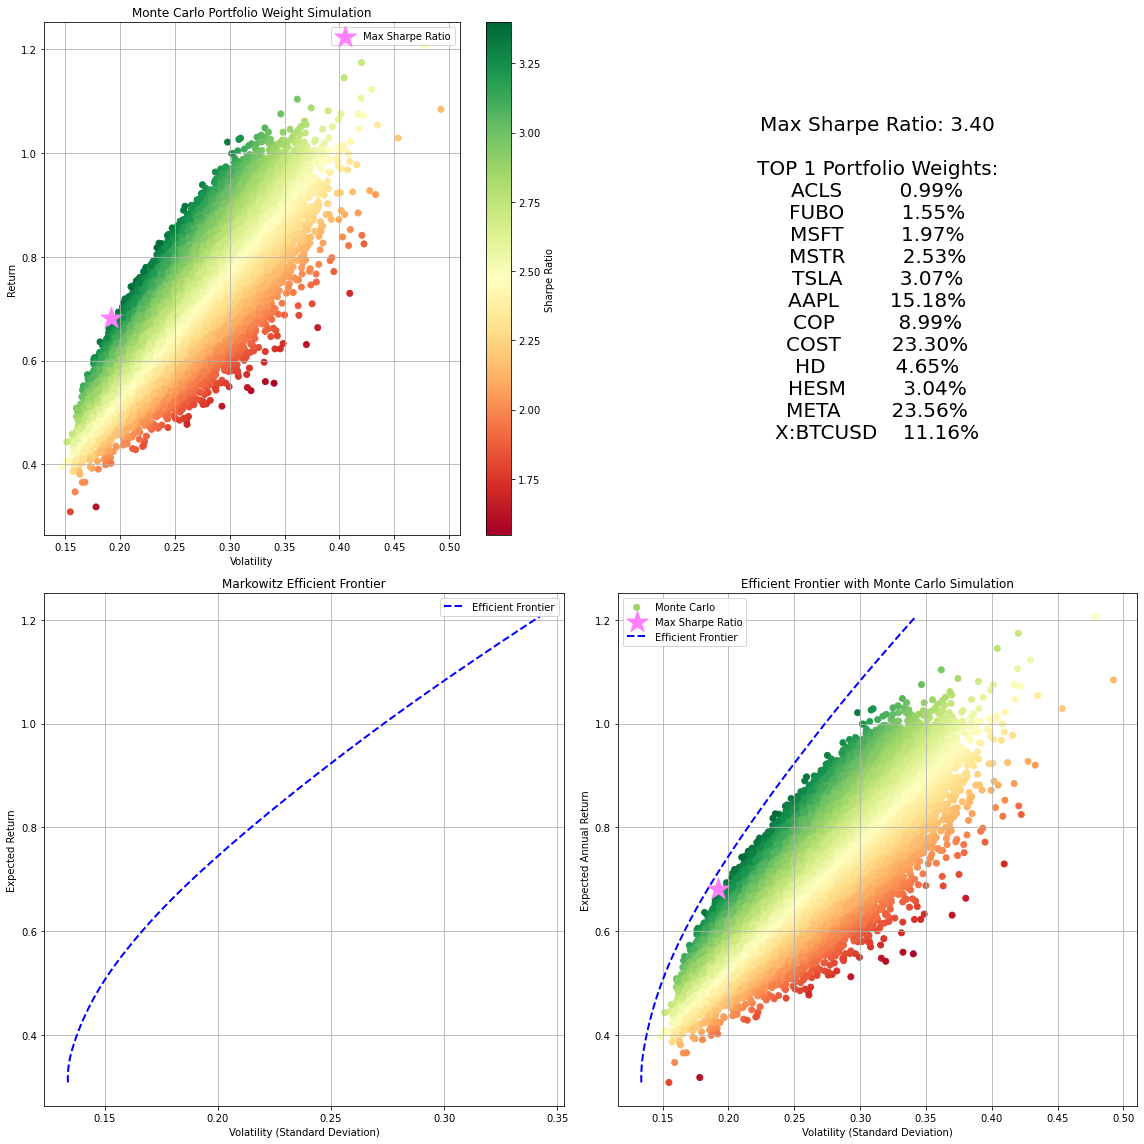

In [6]:
main()